In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Redes Neurais: Autoencoders
* Redução de Dimensionalidade
* Problemas não supervisionados (clusterização)

Autor: Arthur Schneider Figueira

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

2023-10-15 21:02:05.003425: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-15 21:02:05.005110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-15 21:02:05.035759: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-15 21:02:05.035785: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-15 21:02:05.035812: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Contexto & Entendimento da base

O [Medium](https://medium.com/) é uma plataforma para lermos textos de diversos assuntos diferentes. É uma boa fonte para nos atualizarmos ou buscarmos uma introdução a um tema.

Neste laboratório, acessaremos uma base composta por um conjunto de artigos do medium e buscaremos separar os tipos de textos, conforme seus temas.

In [4]:
df = pd.read_csv("medium_articles.csv")
df.tail()

,title,text,url,authors,timestamp,tags
192363,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
192364,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
192365,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
192366,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"
192367,Trying Pimsleur Cantonese in Hong Kong,"Over the past few years, I’ve heard a number o...",https://medium.com/toshuo/trying-pimsleur-cant...,[],2017-06-15 02:24:35.659000+00:00,"['Hong Kong', 'Cantonese', 'Language Learning'..."


In [5]:
temas = []

for i in range(0,len(df)):
  for tag in df['tags'][i].replace("'",'').replace('[','').replace(']','').split(", "): #Precisei corrigir o texto e usar o split
    temas.append(tag)
len(temas)

880602

In [6]:
temas[0:10]

['Mental Health',
 'Health',
 'Psychology',
 'Science',
 'Neuroscience',
 'Mental Health',
 'Coronavirus',
 'Science',
 'Psychology',
 'Neuroscience']

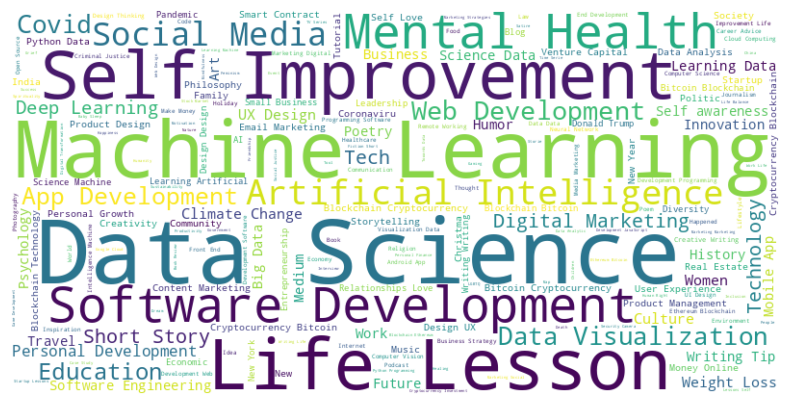

In [7]:
#Principais temas, ilustrado num mapa de palavras
from wordcloud import WordCloud

# Converta a lista de palavras em uma única string
texto = " ".join(temas)

# Crie um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Plote a nuvem de palavras usando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativa os eixos
plt.show()

In [8]:
len(set(temas))

78639

In [9]:
from collections import Counter

contagem = Counter(temas)
print(contagem)

Counter({'Blockchain': 7534, 'Data Science': 7410, 'Technology': 6384, 'Programming': 6364, 'Poetry': 6336, 'Cryptocurrency': 6245, 'Machine Learning': 6055, 'Life': 5954, 'Bitcoin': 5800, 'Writing': 5115, 'Politics': 5074, 'Startup': 4974, 'Life Lessons': 4807, 'Self Improvement': 4267, 'Covid 19': 4176, 'Software Development': 3980, 'Love': 3978, 'Python': 3943, 'Business': 3722, 'Health': 3650, 'Mental Health': 3583, 'JavaScript': 3487, 'Relationships': 3377, 'Education': 3269, 'Artificial Intelligence': 3222, 'Culture': 3027, 'Design': 2932, 'Self': 2876, 'Marketing': 2791, 'Entrepreneurship': 2782, 'Ethereum': 2731, 'Music': 2524, 'Productivity': 2510, 'Web Development': 2498, 'History': 2418, 'Humor': 2386, 'Data Visualization': 2332, 'Leadership': 2317, 'Social Media': 2284, 'Psychology': 2200, 'Travel': 2138, 'Fiction': 2128, 'Creativity': 2069, 'Coronavirus': 2043, 'Parenting': 1983, 'Crypto': 1889, 'Science': 1879, 'Tech': 1850, 'UX': 1818, 'Short Story': 1815, 'Money': 1797,

In [10]:
# Converta o objeto Counter em um DataFrame do pandas
contador = pd.DataFrame.from_dict(contagem, orient='index', columns=['Contagem'])
contador = contador.sort_values(by='Contagem',ascending=False).reset_index()
contador.head(30)

,index,Contagem
0,Blockchain,7534
1,Data Science,7410
2,Technology,6384
3,Programming,6364
4,Poetry,6336
5,Cryptocurrency,6245
6,Machine Learning,6055
7,Life,5954
8,Bitcoin,5800
9,Writing,5115


In [11]:
top50_temas = list(contador['index'][0:50])

for topico in top50_temas: #Para cada um dos top 50 temas
  aux = [] #Criando uma lista vazia
  for i in range(0,len(df)): #Para cada linha da tabela
    if topico in df['tags'][i]: #Se o topico fizer parte da tag, vale 1
      aux.append(1)
    else:
      aux.append(0) #Caso contrario, vale 0
  df[topico] = aux #Criando uma coluna para cada topico

In [12]:
df.head()

,title,text,url,authors,timestamp,tags,Blockchain,Data Science,Technology,Programming,Poetry,Cryptocurrency,...,Social Media,Psychology,Travel,Fiction,Creativity,Coronavirus,Parenting,Crypto,Science,Tech,UX,Short Story
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0


In [13]:
import plotly.express as px

#Calculando a correlação e mantendo apenas baixas correlacoes
corr = df[top50_temas].corr(method='pearson', min_periods=1)
for col in top50_temas:
  corr = corr.loc[((corr[col] > -0.10) & (corr[col] < 0.10)) | (corr[col] == 1)]

corr = corr[list(corr.index)]

mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = px.imshow(corr, #Fonte de dados é a tabela de correlação
                text_auto=True, #Inseri o nome dos dados
                color_continuous_scale=px.colors.diverging.RdBu, #As cores serão de azul (1) a vermelho (-1)
                zmin=-1,zmax=1 #defino que o minimo é -1 e o maximo é 1
                )


fig.update_layout(
    title_text='Correlações entre variáveis numéricas', #titulo
    title_x=0.5,  #Titulo centralizado
    width=700, #largura
    height=700, #altura
    xaxis_showgrid=False, #Para omitir as linhas de grade no eixo x
    yaxis_showgrid=False, #Para omitir as linhas de grade no eixo y
    template='plotly_white' #template
)

fig.show()

In [14]:
contador.loc[(contador['index'].isin(list(corr.index)))]

,index,Contagem
10,Politics,5074
23,Education,3269
25,Culture,3027
31,Music,2524
34,History,2418
35,Humor,2386
37,Leadership,2317
40,Travel,2138
44,Parenting,1983


# Exemplo prático

Vamos montar um projeto para separar os temas de Parenting, Travel e Leadership e Humor.

In [15]:
df.columns

Index(['title', 'text', 'url', 'authors', 'timestamp', 'tags', 'Blockchain',
       'Data Science', 'Technology', 'Programming', 'Poetry', 'Cryptocurrency',
       'Machine Learning', 'Life', 'Bitcoin', 'Writing', 'Politics', 'Startup',
       'Life Lessons', 'Self Improvement', 'Covid 19', 'Software Development',
       'Love', 'Python', 'Business', 'Health', 'Mental Health', 'JavaScript',
       'Relationships', 'Education', 'Artificial Intelligence', 'Culture',
       'Design', 'Self', 'Marketing', 'Entrepreneurship', 'Ethereum', 'Music',
       'Productivity', 'Web Development', 'History', 'Humor',
       'Data Visualization', 'Leadership', 'Social Media', 'Psychology',
       'Travel', 'Fiction', 'Creativity', 'Coronavirus', 'Parenting', 'Crypto',
       'Science', 'Tech', 'UX', 'Short Story'],
      dtype='object')

In [16]:
df_modelagem_exemplo = df.loc[((df['Covid 19'] == 1) | (df['Software Development'] == 1) | (df['Web Development'] == 1) | (df['Machine Learning'] == 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']]
df_modelagem_exemplo.reset_index(drop=True, inplace=True)
df_modelagem_exemplo.tail()

,title,text,url,authors,timestamp,tags
16423,CRM (Customer Relationship Management) Software,What is CRM (Customer Relationship Management)...,https://medium.com/@iconictek/crm-customer-rel...,[],2020-12-26 06:52:53.373000+00:00,"['Crm Software', 'Crm Solution', 'CRM', 'Busin..."
16424,Decentralization of protocol frontend,Decentralization of protocol frontend\n\nMany ...,https://medium.com/@getunrekt/decentralization...,[],2021-04-08 10:15:49.607000+00:00,"['Smart Contract Blockchain', 'Web Development..."
16425,Prelude: Making Mess 3.0,Mess Phase 2 (2010–2016)\n\nPrelude: Making Me...,https://medium.com/@robrob/prelude-making-mess...,['Rob Robinson'],2016-12-19 15:17:08.764000+00:00,"['Digital Marketing Agency', 'Web Design', 'We..."
16426,Best Tips for website image optimization,Best Tips for website image optimization\n\nWh...,https://medium.com/@ultimezdipika/best-tips-fo...,[],2016-11-23 04:46:25.276000+00:00,"['Web Development', 'Digital Marketing', 'Digi..."
16427,Digital marketing techniques to appeal your sp...,"To most businesses, the digital marketing land...",https://medium.com/@seohounddog01/digital-mark...,['Seo Hound Dog'],2016-11-22 10:29:23.169000+00:00,"['Digital Marketing', 'Marketing', 'Digital Ma..."


## Criando as variaveis Explicativas

Para análise de textos, as variáveis explicativas são as palavras (ou conjuntos de palavras) dos textos. Assim como em outros projetos de Ciência de Dados, há a necessidade de tratamentos dos dados e transformações.

**Tratamentos**:
1. Remoção de pontuações e símbolos;
2. Padronização: manter os textos minúsculos, por exemplo.
3. Remoção de stopwords: stopwords são termos que não agregam no modelo. Por exemplo, uma coluna ID não seria utilizada num modelo. Textos que não agregam também não, como "e", "ou", "boa tarde", entre outros.
4. Normalização léxica: stemming/lematização é quando convertemos a palavra em sua forma base. Por exemplo: andarei, andaria -> andar. querido, querida -> querid. Em outras palavras, removemos conjugações verbais, gêneros das palavras.

In [17]:
# Exemplo
df_modelagem_exemplo['text'][9732]

'1. Pick a good WordPress theme\n\nPicking the right theme is hard; don’t underestimate it. There are many good-looking themes, but it’s hard to judge a book by its cover. There are many crappy themes that may look nice on the surface but are horribly coded and inflexible. They are built to sell, not to keep working flawlessly in the long run.\n\nOne of the many available WordPress themes — Image by GeneratePress\n\nEven though the appearance is a crucial part of a WordPress theme, it’s not the most crucial. Here are more important factors to consider:\n\nThe amount of HTML, CSS, and JavaScript should be kept to a minimum: it will greatly benefit your site’s speed. Also, less JavaScript means fewer attack vectors for hackers. Some themes include hundreds of kilobytes of external libraries, to use one single feature.\n\nNot all themes are as flexible or customizable as you might hope. That’s not always a problem; you can create a child theme and add your own customizations, that is, if 

In [18]:
# Removendo \n e mantendo todos os termos minusculos
exemplo = df_modelagem_exemplo['text'][9732].replace("\n"," ").replace("  "," ").lower()
exemplo

'1. pick a good wordpress theme picking the right theme is hard; don’t underestimate it. there are many good-looking themes, but it’s hard to judge a book by its cover. there are many crappy themes that may look nice on the surface but are horribly coded and inflexible. they are built to sell, not to keep working flawlessly in the long run. one of the many available wordpress themes — image by generatepress even though the appearance is a crucial part of a wordpress theme, it’s not the most crucial. here are more important factors to consider: the amount of html, css, and javascript should be kept to a minimum: it will greatly benefit your site’s speed. also, less javascript means fewer attack vectors for hackers. some themes include hundreds of kilobytes of external libraries, to use one single feature. not all themes are as flexible or customizable as you might hope. that’s not always a problem; you can create a child theme and add your own customizations, that is, if you’re a develo

In [19]:
exemplo = exemplo.split()
exemplo[0:15]

['1.',
 'pick',
 'a',
 'good',
 'wordpress',
 'theme',
 'picking',
 'the',
 'right',
 'theme',
 'is',
 'hard;',
 'don’t',
 'underestimate',
 'it.']

In [20]:
import string
string.ascii_letters #Identificando as letras do alfabeto

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [21]:
exemplo = [w for w in exemplo if w.isalpha() and w not in string.ascii_letters]
#isalpha retorna apenas textos. Logo, removemos o '2'
#w not in string.ascii_letters -> não queremos apenas uma letra sozinha. Removemos o 'a' e o 'you're'
exemplo[0:15]

['pick',
 'good',
 'wordpress',
 'theme',
 'picking',
 'the',
 'right',
 'theme',
 'is',
 'underestimate',
 'there',
 'are',
 'many',
 'but',
 'hard']

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/somnus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

# lista das stop words
stop_words = stopwords.words('english') #em inglês
print(stop_words[:5])

['i', 'me', 'my', 'myself', 'we']


In [24]:
#Se der erro o download anterior
# stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [25]:
exemplo = [w for w in exemplo if w not in stop_words]
exemplo[0:15]
#Sobrou, por exemplo, o "oh"

['pick',
 'good',
 'wordpress',
 'theme',
 'picking',
 'right',
 'theme',
 'underestimate',
 'many',
 'hard',
 'judge',
 'book',
 'many',
 'crappy',
 'themes']

In [26]:
from nltk.stem import PorterStemmer

words = [PorterStemmer().stem(w) for w in exemplo]
exemplo[0:15] #Dá para notar potenciais melhorias. Kids poderia ser Kid, por exemplo.

['pick',
 'good',
 'wordpress',
 'theme',
 'picking',
 'right',
 'theme',
 'underestimate',
 'many',
 'hard',
 'judge',
 'book',
 'many',
 'crappy',
 'themes']

In [27]:
from tqdm import tqdm

# Passo 1: Extraindo as palavras dos textos
words = []
text2 = []
for i in tqdm(range(0,len(df_modelagem_exemplo))):
  texto = df_modelagem_exemplo['text'][i].replace("\n"," ").lower()
  palavras = texto.split()
  palavras = [w for w in palavras if w.isalpha() and w not in string.ascii_letters]
  palavras = [w for w in palavras if w not in stop_words]
  palavras = [PorterStemmer().stem(w) for w in palavras]
  text2.append(" ".join(palavras))
  for termo in palavras:
    words.append(termo)
df_modelagem_exemplo['text2'] = text2

  1%|          | 143/16428 [00:00<01:00, 271.33it/s]

100%|██████████| 16428/16428 [01:02<00:00, 263.22it/s]


In [28]:
print(len(words), len(set(words)))
# Ha 47901 termos/palavras distintos
# Ha 3.117.640 termos/palavras no total

6569519 64169


## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d}
$$

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

Combinando tudo temos:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$

[Video](https://www.youtube.com/watch?v=C3V2Lf1Y9Qk)

In [29]:
contagem = Counter(words)
contador = pd.DataFrame.from_dict(contagem, orient='index', columns=['Contagem'])
contador = contador.sort_values(by='Contagem',ascending=False).reset_index()
contador.describe(percentiles=[.8,.85,.9,.95,.96,.97,.98,.99,.995])

,Contagem
count,64169.000000
mean,102.378391
std,944.144497
min,1.000000
50%,2.000000
80%,11.000000
85%,20.000000
90%,47.000000
95%,194.000000
96%,292.280000


In [30]:
palavras_explicativas = list(contador.loc[(contador['Contagem'] >= 700) & (contador['Contagem'] < 1000),'index'])
len(palavras_explicativas)
#Entre 700 e 1000 repeticoes, temos 250 palavras/variaveis explicativas.

306

In [31]:
len(df_modelagem_exemplo) #Tenho 9734 linhas na tabela

16428

In [32]:
df_modelagem_exemplo = df_modelagem_exemplo.loc[df_modelagem_exemplo['text2'] != ""].reset_index(drop=True)
df_modelagem_exemplo

,title,text,url,authors,timestamp,tags,text2
0,Occam’s dice,Occam’s dice\n\nDistrusting biological metapho...,https://medium.com/the-spike/occams-dice-258aa...,['Kelly Clancy'],2018-08-22 14:55:56.262000+00:00,"['Machine Learning', 'Science', 'Neuroscience'...",dice distrust biolog metaphor aim scienc seek ...
1,Facing Three Fundamental Coronavirus Fears,1. Since immunity to the novel coronavirus may...,https://medium.com/microbial-instincts/facing-...,['Bo Stapler'],2020-08-11 19:37:46.296000+00:00,"['Health', 'Science', 'Wellness', 'Coronavirus...",sinc immun novel coronaviru may last viru need...
2,What Should Systems Neuroscience Do Next? Volt...,What Should Systems Neuroscience Do Next? Volt...,https://medium.com/the-spike/what-should-syste...,['Mark Humphries'],2019-12-30 20:32:09.324000+00:00,"['Neuroscience', 'Psychology', 'Artificial Int...",system neurosci voltag imag fire wire time pix...
3,Evolution doesn’t give a damn what you think a...,"To evolution, the brain is just a gigantic bag...",https://medium.com/the-spike/evolution-doesnt-...,['Mark Humphries'],2020-06-07 18:40:02.586000+00:00,"['Neuroscience', 'Psychology', 'Artificial Int...",brain gigant bag wire purpos gigant bag cell c...
4,AI analyzes language to predict schizophrenia,A machine learning method uncovered a hidden c...,https://medium.com/artificial-intelligence-net...,['Phil Siarri'],2019-06-22 20:01:01.096000+00:00,"['Machine Learning', 'Mental Health', 'Health'...",machin learn method uncov hidden clue languag ...
...,...,...,...,...,...,...,...
16423,CRM (Customer Relationship Management) Software,What is CRM (Customer Relationship Management)...,https://medium.com/@iconictek/crm-customer-rel...,[],2020-12-26 06:52:53.373000+00:00,"['Crm Software', 'Crm Solution', 'CRM', 'Busin...",crm relationship crm stand custom relationship...
16424,Decentralization of protocol frontend,Decentralization of protocol frontend\n\nMany ...,https://medium.com/@getunrekt/decentralization...,[],2021-04-08 10:15:49.607000+00:00,"['Smart Contract Blockchain', 'Web Development...",decentr protocol frontend mani user depend web...
16425,Prelude: Making Mess 3.0,Mess Phase 2 (2010–2016)\n\nPrelude: Making Me...,https://medium.com/@robrob/prelude-making-mess...,['Rob Robinson'],2016-12-19 15:17:08.764000+00:00,"['Digital Marketing Agency', 'Web Design', 'We...",mess phase make mess declar independ hold comp...
16426,Best Tips for website image optimization,Best Tips for website image optimization\n\nWh...,https://medium.com/@ultimezdipika/best-tips-fo...,[],2016-11-23 04:46:25.276000+00:00,"['Web Development', 'Digital Marketing', 'Digi...",best tip websit imag optim imag imag optim not...


In [33]:
vars_expl = []
for col in tqdm(palavras_explicativas):
  tf = []
  t_em_todos = 0
  colname = "TFIDF "+str(col)
  vars_expl.append(colname)
  for i in range(0,len(df_modelagem_exemplo)):
    d = df_modelagem_exemplo['text2'][i].split()
    t_em_d = d.count(col)
    palavras_em_d = len(d)
    tf.append(t_em_d/palavras_em_d)
    t_em_todos = t_em_todos + t_em_d
  N = len(df_modelagem_exemplo)
  idf = N / t_em_todos
  tdidf = [x*math.log(idf, 10) for x in tf]
  df_modelagem_exemplo[colname] = tdidf

  0%|          | 1/306 [00:00<01:13,  4.16it/s]

 32%|███▏      | 99/306 [00:23<00:46,  4.48it/s]/tmp/ipykernel_361074/2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

 33%|███▎      | 100/306 [00:23<00:46,  4.42it/s]/tmp/ipykernel_361074/2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

 33%|███▎      | 101/306 [00:23<00:46,  4.40it/s]/tmp/ipykernel_361074/2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [34]:
df_modelagem_exemplo.tail()

,title,text,url,authors,timestamp,tags,text2,TFIDF catch,TFIDF trade,TFIDF transit,TFIDF eye,TFIDF robot,...,TFIDF art,TFIDF sick,TFIDF trace,TFIDF sustain,TFIDF attend,TFIDF svm,TFIDF onto,TFIDF attract,TFIDF worst,TFIDF facilit,TFIDF residu,TFIDF intens
16423,CRM (Customer Relationship Management) Software,What is CRM (Customer Relationship Management)...,https://medium.com/@iconictek/crm-customer-rel...,[],2020-12-26 06:52:53.373000+00:00,"['Crm Software', 'Crm Solution', 'CRM', 'Busin...",crm relationship crm stand custom relationship...,0.0,0.0,0.0,0.0,0.0,...,0.009736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16424,Decentralization of protocol frontend,Decentralization of protocol frontend\n\nMany ...,https://medium.com/@getunrekt/decentralization...,[],2021-04-08 10:15:49.607000+00:00,"['Smart Contract Blockchain', 'Web Development...",decentr protocol frontend mani user depend web...,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16425,Prelude: Making Mess 3.0,Mess Phase 2 (2010–2016)\n\nPrelude: Making Me...,https://medium.com/@robrob/prelude-making-mess...,['Rob Robinson'],2016-12-19 15:17:08.764000+00:00,"['Digital Marketing Agency', 'Web Design', 'We...",mess phase make mess declar independ hold comp...,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16426,Best Tips for website image optimization,Best Tips for website image optimization\n\nWh...,https://medium.com/@ultimezdipika/best-tips-fo...,[],2016-11-23 04:46:25.276000+00:00,"['Web Development', 'Digital Marketing', 'Digi...",best tip websit imag optim imag imag optim not...,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16427,Digital marketing techniques to appeal your sp...,"To most businesses, the digital marketing land...",https://medium.com/@seohounddog01/digital-mark...,['Seo Hound Dog'],2016-11-22 10:29:23.169000+00:00,"['Digital Marketing', 'Marketing', 'Digital Ma...",digit market landscap seem find daunt manag on...,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_modelagem_exemplo[vars_expl].describe(percentiles=[.9,.95,.96,.97,.98,.99])

,TFIDF catch,TFIDF trade,TFIDF transit,TFIDF eye,TFIDF robot,TFIDF retriev,TFIDF survey,TFIDF feder,TFIDF jupyt,TFIDF lie,TFIDF facebook,TFIDF teacher,...,TFIDF art,TFIDF sick,TFIDF trace,TFIDF sustain,TFIDF attend,TFIDF svm,TFIDF onto,TFIDF attract,TFIDF worst,TFIDF facilit,TFIDF residu,TFIDF intens
count,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,...,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000,16428.000000
mean,0.000205,0.000177,0.000180,0.000213,0.000157,0.000170,0.000171,0.000181,0.000200,0.000199,0.000220,0.000181,...,0.000161,0.000145,0.000129,0.000151,0.000157,0.000146,0.000136,0.000144,0.000154,0.000139,0.000131,0.000147
std,0.001547,0.001936,0.001748,0.001773,0.003023,0.001483,0.001527,0.001586,0.002218,0.002717,0.003642,0.002041,...,0.001558,0.001515,0.001335,0.001910,0.001444,0.002304,0.001026,0.001131,0.001539,0.001123,0.002118,0.001732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96%,0.001224,0.000000,0.000000,0.001273,0.000000,0.000000,0.000000,0.000000,0.000000,0.001141,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97%,0.002174,0.000000,0.001529,0.002167,0.000000,0.001146,0.001048,0.000000,0.000000,0.001975,0.001442,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001303,0.001421,0.001462,0.001231,0.000000,0.000746
98%,0.003325,0.001936,0.002796,0.003351,0.000000,0.002636,0.002434,0.002559,0.002248,0.002924,0.002842,0.001434,...,0.002348,0.002115,0.001331,0.002194,0.002613,0.000000,0.002579,0.002345,0.002730,0.002542,0.000000,0.002359


### Treinando AutoEncoder - L2 (Ridge)

In [36]:
from tensorflow.keras.regularizers import l2

num_features = len(vars_expl)

# Defina a arquitetura do autoencoder (usando apenas parte das camadas)
input_layer = Input(shape=(306,))
encoded_128 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
encoded_64 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(encoded_128)
encoded_32 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded_64)
encoded_16 = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(encoded_32)

decoded_32 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded_16)
decoded_64 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(decoded_32)
decoded_128 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(decoded_64)
decoded_250 = Dense(num_features, activation='relu', kernel_regularizer=l2(0.01))(decoded_128)

autoencoder = Model(input_layer, decoded_250)

# Compile o modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

2023-10-15 21:04:52.460178: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-15 21:04:52.460523: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [37]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 306)]             0         
                                                                 
 dense (Dense)               (None, 128)               39296     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112  

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Callbacks
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 100:
        return 0.001
    elif epoch < 200:
        return 0.0005
    elif epoch < 300:
        return 0.00001
    else:
        return 0.00005

# Criando o callback para o Learning Rate Scheduler
lr_scheduler = LearningRateScheduler(lr_scheduler)

In [39]:
X_train = df_modelagem_exemplo[vars_expl]

history1 = autoencoder.fit(X_train.values, X_train.values, epochs=1000, batch_size=256, verbose=1)#,
                    #callbacks=[early_stopping_callback,lr_scheduler_callback])

# Use o autoencoder para reconstruir os dados
reconstructed_data = autoencoder.predict(X_train)

Epoch 1/1000
65/65 [==============================] - 1s 2ms/step - loss: 3.5972
Epoch 2/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.8893
Epoch 3/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 4/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0915
Epoch 5/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 6/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 7/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 8/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/1000
65/65 [==============================] - 0s 2ms/step - loss: 8.0813e-04
Epoch 10/1000
65/65 [==============================] - 0s 2ms/step - loss: 2.9602e-04
Epoch 11/1000
65/65 [==============================] - 0s 2ms/step - loss: 1.0460e-04
Epoch 12/1000
65/65 [==============================] - 0s 2ms/step - loss: 3.6538e-05
Epoch 13/

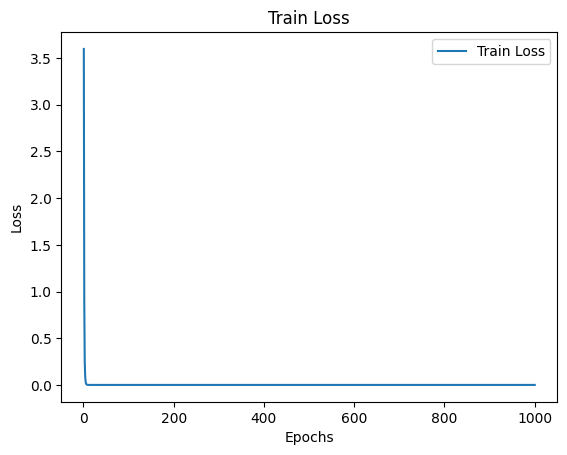

In [40]:
train_loss1 = history1.history['loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()

In [41]:
# Calcule o RMSE entre os dados originais e reconstruídos
rmse = (np.mean(np.square(X_train - reconstructed_data)))**0.5
print(f"RMSE: {rmse}")

RMSE: 0.0019030107055608314


### Utilizando menor dimensionalidade para segmentar os tipos de textos

Neste exemplo, vamos reduzir as 250 colunas em 16 colunas, usando a 4a camada da rede neural treinada.

In [42]:
from tensorflow.keras.models import Model

# Crie um novo modelo que inclui apenas as camadas até encoded_16
model_encoded_16 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[4].output)

# Use o modelo para obter as saídas da camada encoded_16
encoded_16_outputs = model_encoded_16.predict(X_train)


type(encoded_16_outputs)

514/514 [==============================] - 0s 373us/step


numpy.ndarray

### K-means & AutoEncoder

In [43]:
from sklearn.cluster import KMeans

In [44]:
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model.fit(encoded_16_outputs)

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.



KMeans(n_clusters=4, random_state=0)

In [45]:
# Obtenha os rótulos dos clusters para cada amostra
cluster_labels = kmeans_model.labels_

len(cluster_labels)

16428

In [46]:
# ((df['Covid 19'] == 1) | (df['Software Development'] == 1) | (df['Web Development'] == 1) | (df['Machine Learning'] == 1))

In [47]:
df_modelagem_exemplo['Clusters'] = cluster_labels

cols_mdl = []
for tag in ['Covid 19', 'Software Development', 'Web Development', 'Machine Learning']:
  aux = []
  for i in range(0,len(df_modelagem_exemplo)):
    if tag in df_modelagem_exemplo['tags'][i]:
      aux.append(1)
    else:
      aux.append(0)
  colname = tag+'_Dummy'
  cols_mdl.append(colname)
  df_modelagem_exemplo[colname] = aux

/tmp/ipykernel_361074/222547861.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_361074/222547861.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_361074/222547861.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_361074/222547861.py:13: Performa

In [48]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Covid 19_Dummy,Software Development_Dummy,Web Development_Dummy,Machine Learning_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,4438,3993,2571,6106


Neste exemplo, o método k-means não separou os textos, conforme os tipos.

## Testando PCA

In [49]:
from sklearn.decomposition import PCA

In [50]:
# Crie uma instância do PCA
pca = PCA(n_components=16)  # Número de componentes desejados após a redução

# Ajuste o PCA aos dados de treinamento
pca.fit(X_train)

# Transforme os dados de treinamento para as novas dimensões
X_train_pca = pca.transform(X_train)

In [51]:
X_train_pca

array([[-4.76607146e-04, -2.90225019e-04, -2.28355674e-04, ...,
         1.04768308e-04, -2.75967543e-04,  5.21316133e-04],
       [-4.54904694e-04, -2.48124396e-04, -1.43978205e-04, ...,
        -7.80703806e-04, -2.96441273e-04, -5.49532957e-04],
       [-4.33149765e-04, -2.67570430e-04, -1.93233311e-04, ...,
         1.01295619e-04, -1.63660647e-04, -1.06723220e-04],
       ...,
       [-4.39353358e-04, -2.26092431e-04, -1.79195808e-04, ...,
        -3.06667810e-04,  2.14959725e-04,  1.08246639e-05],
       [-4.42094816e-04, -2.88897766e-04, -2.23628342e-04, ...,
         3.89207095e-05, -1.65359259e-05,  4.72677496e-05],
       [-4.59435680e-04, -2.61286694e-04, -2.02258705e-04, ...,
        -8.01685855e-04, -1.86254207e-04,  5.25213489e-04]])

### K-means & PCA

In [52]:
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model_pca = KMeans(n_clusters=4, random_state=0)

# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model_pca.fit(X_train_pca)

# Obtenha os rótulos dos clusters para cada amostra
cluster_labels2 = kmeans_model_pca.labels_

len(cluster_labels2)

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



16428

In [53]:
df_modelagem_exemplo['Clusters_PCA'] = cluster_labels2

df_modelagem_exemplo.groupby(['Clusters_PCA'])[cols_mdl].agg(['sum'])

/tmp/ipykernel_361074/1796774688.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,Covid 19_Dummy,Software Development_Dummy,Web Development_Dummy,Machine Learning_Dummy
,sum,sum,sum,sum
Clusters_PCA,,,,
0,4430,3985,2571,6083
1,3,1,0,0
2,5,7,0,22
3,0,0,0,1


### Random Forest e AutoEncoder

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# ((df['Covid 19'] == 1) | (df['Software Development'] == 1) | (df['Web Development'] == 1) | (df['Machine Learning'] == 1))

In [56]:
classes = []
for i in range(0,len(df_modelagem_exemplo)):
  if df_modelagem_exemplo['Covid 19_Dummy'][i] == 1:
    classes.append(1)
  elif df_modelagem_exemplo['Software Development_Dummy'][i] == 1:
    classes.append(2)
  elif df_modelagem_exemplo['Web Development_Dummy'][i] == 1:
    classes.append(3)
  elif df_modelagem_exemplo['Machine Learning_Dummy'][i] == 1:
    classes.append(4)
  else:
    print("ver indice: ",i)


In [57]:
# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(X_train, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.6369446135118685


In [58]:
X_train3 = X_test.copy()
X_train3['y'] = y_test
X_train3['predictions'] = predictions

In [59]:
table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
1,691,91,42,115
2,90,413,208,143
3,4,39,60,6
4,117,234,104,929


In [60]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
1,0.766075,0.117117,0.101449,0.096396
2,0.099778,0.531532,0.502415,0.119866
3,0.004435,0.050193,0.144928,0.005029
4,0.129712,0.301158,0.251208,0.778709


### Conclusao

Percebemos que com algoritmo supervisionado, os temas 1, 2 e 3 foram previstos com maior facilidade, usando apenas 16 variáveis explicativas.

Já o algoritmo não supervisionado não foi capaz de realizar a separação como o esperado.

Vale ressaltar, que a maior frequência de preditos foi do respectivo tema corretamente. Em outras palavras, para o tema 4 cuja assertividade foi menor, 35% dos casos foram previstos para o tema 4.

# Exercicios

1. Realize um teste usando as camadas encoded_128, encoded_64 e encoded_32 da rede neural já treinada. Avalie se o método K-means e Random Forest seriam capazes de acertar mais as predições, usando os mesmos parâmetros dos exemplos.

Em outras palavras,
3 outputs de rede neural * 2 algoritmos = **6 modelos diferentes**.

2. Baseado na prática que teve maior assertividade na etapa anterior, treine uma rede neural com a mesma arquitetura para os demais temas.

Sugestão: utilize o código abaixo:



```
df_modelagem_atividade = df.loc[((df['Humor'] != 1) & (df['Leadership'] != 1) & (df['Travel'] != 1) & (df['Parenting'] != 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']]
```
**Lembrete:** é preciso realizar toda a etapa de tratamento e transformação nos dados. Talvez seja mais simples criar uma cópia deste notebook e alterar apenas a base de modelagem.




In [61]:
df_modelagem_atividade = df.loc[((df['Humor'] != 1) & (df['Leadership'] != 1) & (df['Travel'] != 1) & (df['Parenting'] != 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']].reset_index(drop=True)

In [62]:
df_modelagem_atividade.tail()

,title,text,url,authors,timestamp,tags
182629,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
182630,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
182631,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
182632,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"
182633,Trying Pimsleur Cantonese in Hong Kong,"Over the past few years, I’ve heard a number o...",https://medium.com/toshuo/trying-pimsleur-cant...,[],2017-06-15 02:24:35.659000+00:00,"['Hong Kong', 'Cantonese', 'Language Learning'..."


## EX 1


In [63]:
from tensorflow.keras.models import Model

# Crie um novo modelo que inclui apenas as camadas até encoded_16
model_encoded_32 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)

model_encoded_64 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

model_encoded_128 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Use o modelo para obter as saídas da camada encoded_16
encoded_32_outputs = model_encoded_32.predict(X_train)

encoded_64_outputs = model_encoded_64.predict(X_train)

encoded_128_outputs = model_encoded_128.predict(X_train)

  1/514 [..............................] - ETA: 9s

514/514 [==============================] - 0s 343us/step


In [64]:
## print all encoded collumns count
print(encoded_32_outputs.shape)
print(encoded_64_outputs.shape)
print(encoded_128_outputs.shape)

(16428, 32)
(16428, 64)
(16428, 128)


In [65]:
from sklearn.cluster import KMeans
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model_32 = KMeans(n_clusters=4, random_state=0)

kmeans_model_64 = KMeans(n_clusters=4, random_state=0)

kmeans_model_128 = KMeans(n_clusters=4, random_state=0)


# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model_32.fit(encoded_32_outputs)

kmeans_model_64.fit(encoded_64_outputs)

kmeans_model_128.fit(encoded_128_outputs)

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/ac04/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning:

Number of

KMeans(n_clusters=4, random_state=0)

In [66]:
# Obtenha os rótulos dos clusters para cada amostra
cluster_labels = kmeans_model_32.labels_

len(cluster_labels)

16428

# Teste Encoder 32

## K-Means

In [67]:
cluster_labels_32 = kmeans_model_32.labels_


df_modelagem_exemplo['Clusters'] = cluster_labels_32

cols_mdl = []
for tag in ['Covid 19', 'Software Development', 'Web Development', 'Machine Learning']:
  aux = []
  for i in range(0,len(df_modelagem_exemplo)):
    if tag in df_modelagem_exemplo['tags'][i]:
      aux.append(1)
    else:
      aux.append(0)
  colname = tag+'_Dummy'
  cols_mdl.append(colname)
  df_modelagem_exemplo[colname] = aux

In [68]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Covid 19_Dummy,Software Development_Dummy,Web Development_Dummy,Machine Learning_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,4438,3993,2571,6106


## Random Forest

In [69]:
classes = []
for i in range(0,len(df_modelagem_exemplo)):
  if df_modelagem_exemplo['Covid 19_Dummy'][i] == 1:
    classes.append(1)
  elif df_modelagem_exemplo['Software Development_Dummy'][i] == 1:
    classes.append(2)
  elif df_modelagem_exemplo['Web Development_Dummy'][i] == 1:
    classes.append(3)
  elif df_modelagem_exemplo['Machine Learning_Dummy'][i] == 1:
    classes.append(4)
  else:
    print("ver indice: ",i)

In [70]:
# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_32_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.36305538648813146


In [71]:
# X_train3 = X_test.copy()
# X_train3['y'] = y_test
# X_train3['predictions'] = predictions

In [72]:
X_train3 = pd.DataFrame(X_test)
X_train3['y'] = y_test
X_train3['predictions'] = predictions


In [73]:
table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
4,902,777,414,1193


In [74]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
4,1.0,1.0,1.0,1.0


# Teste Encoder 64

## K-Means

In [75]:
cluster_labels_64 = kmeans_model_64.labels_


df_modelagem_exemplo['Clusters'] = cluster_labels_64

cols_mdl = []
for tag in ['Covid 19', 'Software Development', 'Web Development', 'Machine Learning']:
  aux = []
  for i in range(0,len(df_modelagem_exemplo)):
    if tag in df_modelagem_exemplo['tags'][i]:
      aux.append(1)
    else:
      aux.append(0)
  colname = tag+'_Dummy'
  cols_mdl.append(colname)
  df_modelagem_exemplo[colname] = aux



In [76]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Covid 19_Dummy,Software Development_Dummy,Web Development_Dummy,Machine Learning_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,4438,3993,2571,6106


## Random Forest

In [77]:
classes = []
for i in range(0,len(df_modelagem_exemplo)):
  if df_modelagem_exemplo['Covid 19_Dummy'][i] == 1:
    classes.append(1)
  elif df_modelagem_exemplo['Software Development_Dummy'][i] == 1:
    classes.append(2)
  elif df_modelagem_exemplo['Web Development_Dummy'][i] == 1:
    classes.append(3)
  elif df_modelagem_exemplo['Machine Learning_Dummy'][i] == 1:
    classes.append(4)
  else:
    print("ver indice: ",i)

In [78]:
# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_64_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.36305538648813146


In [79]:
# X_train3 = X_test.copy()
# X_train3['y'] = y_test
# X_train3['predictions'] = predictions

In [80]:
X_train3 = pd.DataFrame(X_test)
X_train3['y'] = y_test
X_train3['predictions'] = predictions


In [81]:
table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
4,902,777,414,1193


In [82]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
4,1.0,1.0,1.0,1.0


# Teste Encoder 128

## K-Means

In [83]:
cluster_labels_128 = kmeans_model_128.labels_


df_modelagem_exemplo['Clusters'] = cluster_labels_128

cols_mdl = []
for tag in ['Covid 19', 'Software Development', 'Web Development', 'Machine Learning']:
  aux = []
  for i in range(0,len(df_modelagem_exemplo)):
    if tag in df_modelagem_exemplo['tags'][i]:
      aux.append(1)
    else:
      aux.append(0)
  colname = tag+'_Dummy'
  cols_mdl.append(colname)
  df_modelagem_exemplo[colname] = aux

In [84]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Covid 19_Dummy,Software Development_Dummy,Web Development_Dummy,Machine Learning_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,4386,3976,2554,6083
1,18,9,8,16
2,34,6,0,6
3,0,2,9,1


## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
classes = []
for i in range(0,len(df_modelagem_exemplo)):
  if df_modelagem_exemplo['Covid 19_Dummy'][i] == 1:
    classes.append(1)
  elif df_modelagem_exemplo['Software Development_Dummy'][i] == 1:
    classes.append(2)
  elif df_modelagem_exemplo['Web Development_Dummy'][i] == 1:
    classes.append(3)
  elif df_modelagem_exemplo['Machine Learning_Dummy'][i] == 1:
    classes.append(4)
  else:
    print("ver indice: ",i)


In [87]:
# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_128_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.36305538648813146


## Valor anterior: Acurácia: 0.5998972778633795

In [88]:
# X_train3 = X_test.copy()
# X_train3['y'] = y_test
# X_train3['predictions'] = predictions

In [89]:
X_train3 = pd.DataFrame(X_test)
X_train3['y'] = y_test
X_train3['predictions'] = predictions

In [90]:
table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
4,902,777,414,1193


In [91]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
4,1.0,1.0,1.0,1.0
